# Problem 5 ()

$$
\nabla^{2} \Psi(x, y)=e^{-x}\left(x-2+y^{3}+6 y\right)
$$

$$x,y \in [0,1]$$

$$\Psi(0,y)=y^3,\Psi(1,y)=(1+y^3)e^{-1},\Psi(x,0)=xe^{-x},\Psi(x,1)=e^{-x}(x+1)$$

In [7]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr
from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D 
#%matplotlib inline
from autograd.core import primitive
import numpy as npy


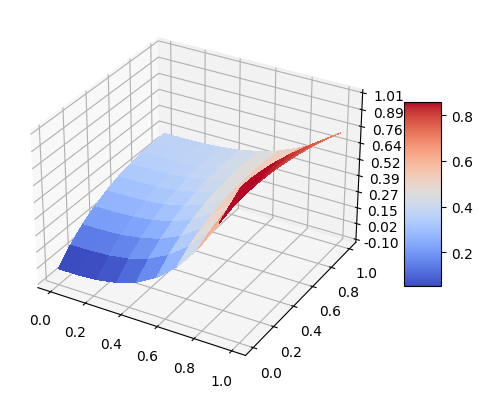

In [14]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
nx = 10
ny = 10

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)


def analytic_solution(x):
     return (np.exp(-x[0])*(x[0]+(x[1]**3)))
             
             
surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = npy.meshgrid(x_space, y_space)

surf = ax.plot_surface(X, Y, surface, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim(-0.1, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
nx = 10
ny = 10

dx = 1. / nx
dy = 1. / ny

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)
print(x_space)
print(y_space)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [10]:
def f0(y):#fi(0,y)
    return y**3
def f1(y):#fi(1,y)
    return (1+y**3)*np.exp(-1)
def g0(x):#fi(x,0)
    return x*np.exp(-x)
def g1(x):#dfi(x,1)/dx
    return np.exp(-x)*(x+1)

In [11]:
def f(x):
    return np.exp(-x[0])*(x[0]-2.+(x[1]**3)+6*x[1])

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])
#(1−x)f0(y)+xf1(y)+(1−y){g0(x)−[(1−x)g0(0)+xg0(1)]}+y{g1(x)−[(1−x)g1(0)+xg1(1)]}
def A(x):
    return (1-x[0])*f0(x[1])+x[0]*f1(x[1])+(1-x[1])*(g0(x[0])-((1-x[0])*g0(0)+x[0]*g0(1)))+x[1]*(g1(x[0])-((1-x[0])*g1(0)+x[0]*g1(1)))


def psy_trial(x, net_out):#A+x(1-x)y(1-y)N
    return A(x) + x[0] * (1 - x[0]) * x[1] * (1 - x[1]) * net_out


def loss_function(W, x, y):
    loss_sum = 0.
    
    for xi in x:
        for yi in y:
            
            input_point = np.array([xi, yi])
            
            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)
            
            psy_t = psy_trial(input_point, net_out)
            psy_t_jacobian = jacobian(psy_trial)(input_point, net_out)
            psy_t_hessian = jacobian(jacobian(psy_trial))(input_point, net_out)

            gradient_of_trial_d2x = psy_t_hessian[0][0]
            gradient_of_trial_d2y = psy_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = ((gradient_of_trial_d2x + gradient_of_trial_d2y) - func)**2
            loss_sum += err_sqr
        
    return loss_sum

In [12]:
W = [npr.randn(2, nx), npr.randn(ny, 1)]
lmb = 0.001

#print( neural_network(W, np.array([1, 1])))

for i in range(100):
   # print(W, x_space, y_space)
    #print(loss_function(W, x_space, y_space))
    loss_grad =  grad(loss_function)(W, x_space, y_space)
   # print(loss_grad)
    print('i=',i,',loss_function= ',loss_function(W, x_space, y_space))

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

i= 0 ,loss_function=  43.668904122172115
i= 1 ,loss_function=  28.128986454229008
i= 2 ,loss_function=  18.578155665037528
i= 3 ,loss_function=  12.695665260896448
i= 4 ,loss_function=  9.065943515189787
i= 5 ,loss_function=  6.82159408809344
i= 6 ,loss_function=  5.429785132415488
i= 7 ,loss_function=  4.562782948975957
i= 8 ,loss_function=  4.018887351299785
i= 9 ,loss_function=  3.6739396745714776
i= 10 ,loss_function=  3.4515132728163676
i= 11 ,loss_function=  3.304568082918865
i= 12 ,loss_function=  3.2041552416753305
i= 13 ,loss_function=  3.1324617802623553
i= 14 ,loss_function=  3.078528159883017
i= 15 ,loss_function=  3.0356119543758755
i= 16 ,loss_function=  2.9995652314813577
i= 17 ,loss_function=  2.967836045334013
i= 18 ,loss_function=  2.938854095431436
i= 19 ,loss_function=  2.9116528059249434
i= 20 ,loss_function=  2.88563687277156
i= 21 ,loss_function=  2.860439301436431
i= 22 ,loss_function=  2.8358334906483695
i= 23 ,loss_function=  2.81167917126414
i= 24 ,loss_funct

analytic_solution:  [0.17794165 0.17904005 0.18672889 0.20759859 0.24823958 0.3152423
 0.41519717 0.55469463 0.74032512 0.97867905]
psy_trial:  [0.17794165 0.18406677 0.19372806 0.21456611 0.25408723 0.31954988
 0.41796024 0.55613914 0.74081065 0.97867905]


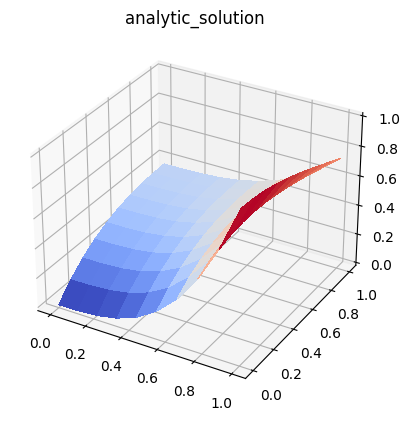

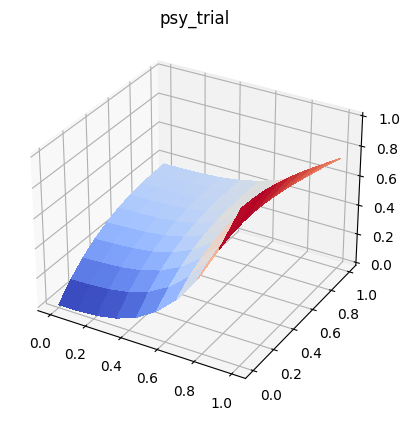

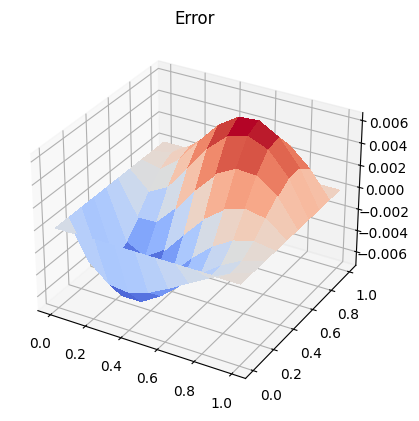

In [18]:
surface = np.zeros((ny, nx))
surface2 = np.zeros((ny, nx))
surface3 = np.zeros((ny, nx))


for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])
        net_outt = neural_network(W, [x, y])[0]
        surface2[i][j] = psy_trial([x, y], net_outt)
        surface3[i][j] = surface[i][j]-surface2[i][j]

        
        
        
print ('analytic_solution: ',surface[2])
print ('psy_trial: ',surface2[2])
        
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = npy.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('analytic_solution')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = npy.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('psy_trial')


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = npy.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Error')

plt.show()

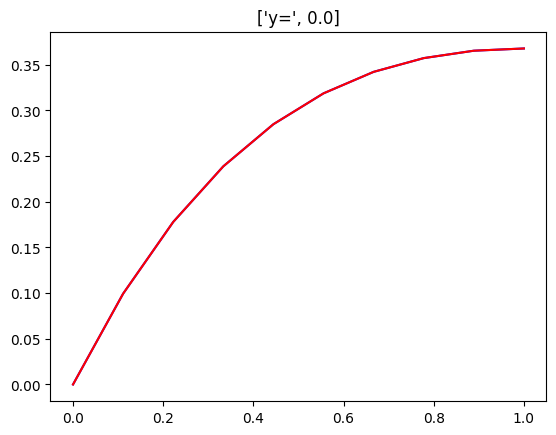

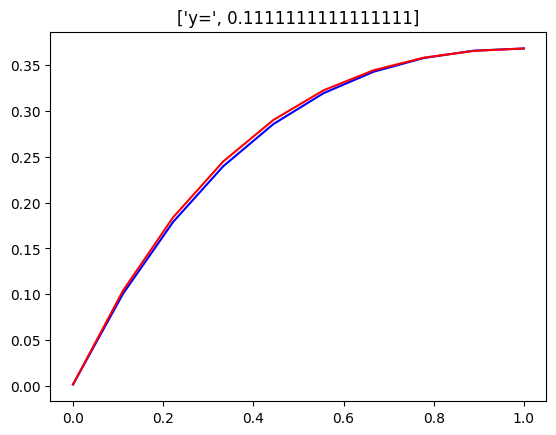

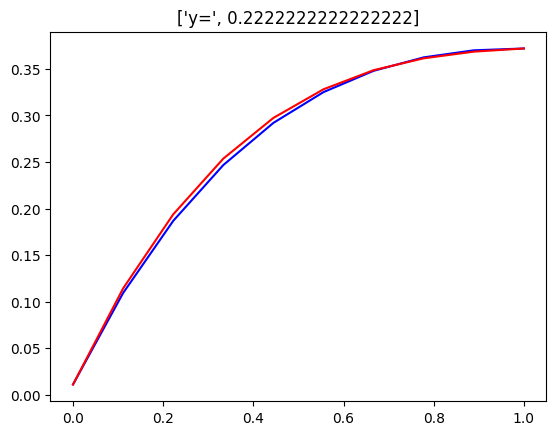

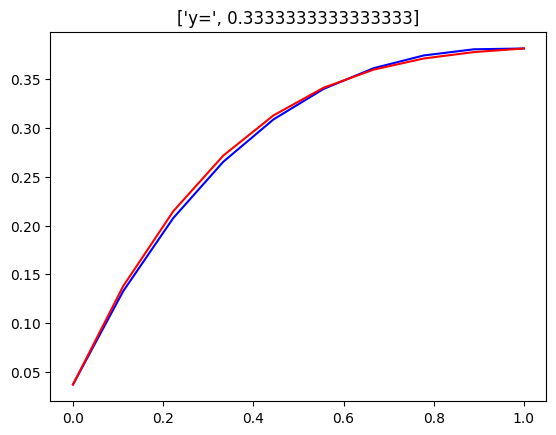

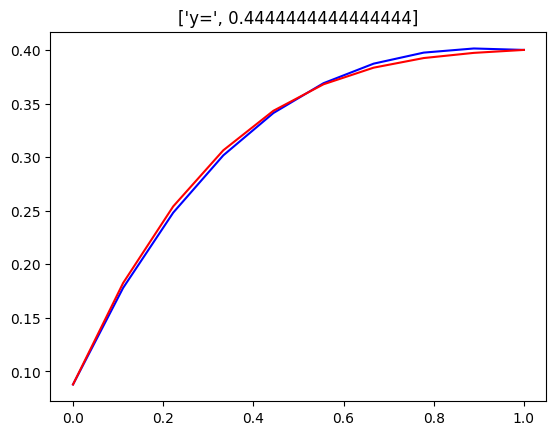

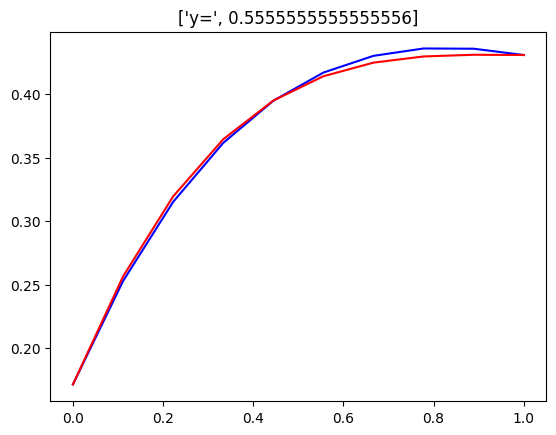

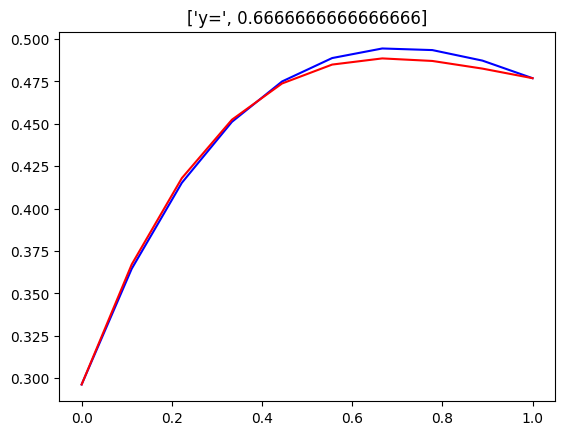

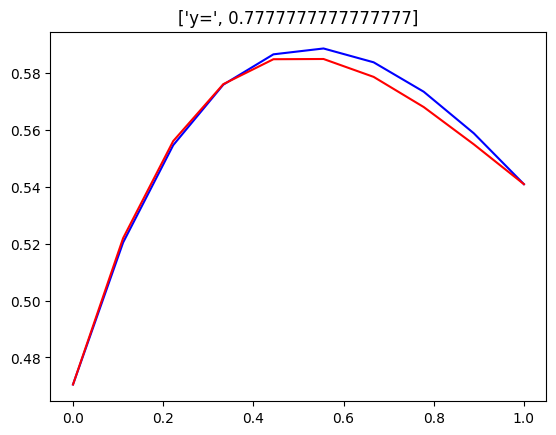

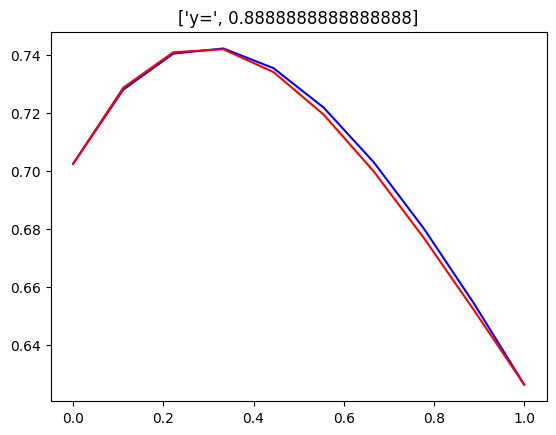

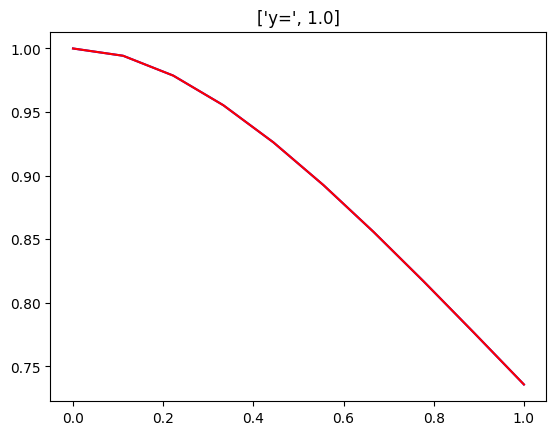

In [19]:
surface10 = np.zeros( nx)
for y in y_space:
    plt.figure()
    plt.plot(x_space,analytic_solution([x_space,y]),'b')#plot [x,y=1]


    for i, x in enumerate(x_space):
        net_outt = neural_network(W, [x, y])[0]
        surface10[i] = psy_trial([x, y], net_outt)
    plt.plot(x_space,surface10,'r')#plot [x,y=1]
    a=['y=',y]
    plt.title(a)
